In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
CSV_PATH="merged_clean.csv"
df=pd.read_csv(CSV_PATH)
random_seed=47


In [2]:
df

,author,context,additional_context,song_title,song_text,source
0,Петре М. Андреевски,"Петок е прекрасен ден за читање поезија, па за...",NaN,Наопачно оро,Наопачно оро – Петре М. Андреевски\n\nКој игра...,song_kafe_kniga
1,Кочо Рацин,На 13 јуни 1943 година загинал Кочо Рацин. И п...,NaN,Балада за непознатиот,Балада за непознатиот – Кочо Рацин\n\nНатаму –...,song_kafe_kniga
2,Гане Тодоровски,На 22 мај 2010 година починал еден од најголем...,NaN,Молитва,Молитва – Гане Тодоровски\n\n(пред крајот на г...,song_kafe_kniga
3,Владо Урошевиќ,Денес на блогот читаме прекрасни македонски ст...,NaN,Слобода,Слобода – Влада Урошевиќ\n\nПтица со пет крила...,song_kafe_kniga
4,Кочо Рацин,"Денес е 1 Мај, Меѓународен ден на трудот. Во т...",NaN,Копачите,Копачите – Кочо Рацин\n\nСе к’ти ноќта црна!\n...,song_kafe_kniga
...,...,...,...,...,...,...
1221,Ристо Лазаров,NaN,Аргетинци,ЕВИТА,ЕВИТА \n \nветриштата од западните пампаси \...,СРЕДЕ
1222,Ристо Лазаров,NaN,Аргетинци,ГАРДЕЛ,ГАРДЕЛ \n \nа зина уста \nа птици ќе си ги рас...,СРЕДЕ
1223,Ристо Лазаров,NaN,Аргетинци,БОРХЕС,БОРХЕС \n \nза жал светот с# уште е стварен \...,СРЕДЕ
1224,Ристо Лазаров,NaN,Аргетинци,САБАТО,САБАТО \n \nво сантос лагоресу законите на фи...,СРЕДЕ


In [3]:
author='Петре М. Андреевски'
author_selection=df.loc[df['author']==author]
print(f'{author} : {len(author_selection)}')

Петре М. Андреевски : 51


Had some duplicate songs from multiple sources,needed to clean the dataset for them. 


In [4]:


def normalize_title(title: str) -> str:
    return title.lower().replace(" ", "")

def find_duplicate_songs(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()
    df["normalized_title"] = df["song_title"].apply(normalize_title)
    grouped = df.groupby(["author", "normalized_title"])
    duplicates = grouped.filter(lambda x: x["source"].nunique() > 1)

    return duplicates
df_duplicates = find_duplicate_songs(df)


In [5]:
df_duplicates

,author,context,additional_context,song_title,song_text,source,normalized_title
6,Блаже Конески,Денес на блогот читаме македонска поезија и пр...,NaN,Разделба,Разделба – Блаже Конески\n\nНам ни е дадено за...,song_kafe_kniga,разделба
13,Блаже Конески,На 19 декември 1921 година се родил еден од на...,NaN,Бура,Бура – Блаже Конески\n\nКолку ненадно иде бура...,song_kafe_kniga,бура
26,Блаже Конески,Честит 2 Август – Илинден! За многу години да ...,NaN,Илинденски мелодии,Илинденски мелодии – Блаже Конески\n\n1.\nБел ...,song_kafe_kniga,илинденскимелодии
47,Петре М. Андреевски,"Денес е петок, кој освен што е последниот рабо...",NaN,Песна за мојата песна,Песна за мојата песна – Петре М. Андреевски\n\...,song_kafe_kniga,песназамојатапесна
50,Блаже Конески,"На денешен ден, 7 декември 1993 година, почина...",NaN,Ѕвезди,Ѕвезди – Блаже Конески\n\nДумам — вие еднаш ми...,song_kafe_kniga,ѕвезди
...,...,...,...,...,...,...,...
1059,Петре М. Андреевски,NaN,ПЕТ ЉУБОВНИ ПИСМА,ПРВО ПИСМО,ПРВО ПИСМО\n\nНишто не е повидливо\nи ништо не...,Дениција,првописмо
1060,Петре М. Андреевски,NaN,ПЕТ ЉУБОВНИ ПИСМА,ВТОРО ПИСМО,ВТОРО ПИСМО\n\nПаметуваш:\nтебе ти прилегаше с...,Дениција,второписмо
1061,Петре М. Андреевски,NaN,ПЕТ ЉУБОВНИ ПИСМА,ТРЕТО ПИСМО,ТРЕТО ПИСМО\n\nБеше тоа еден ден што траеше це...,Дениција,третописмо
1062,Петре М. Андреевски,NaN,ПЕТ ЉУБОВНИ ПИСМА,ЧЕТВРТО ПИСМО,"ЧЕТВРТО ПИСМО\n\nЕдна година јас без тебе, јас...",Дениција,четвртописмо


In [6]:
df_without_duplicates=df



In [7]:
author_selection.head()

,author,context,additional_context,song_title,song_text,source
0,Петре М. Андреевски,"Петок е прекрасен ден за читање поезија, па за...",NaN,Наопачно оро,Наопачно оро – Петре М. Андреевски\n\nКој игра...,song_kafe_kniga
17,Петре М. Андреевски,"Денес е петок, за многумина омилен ден од седм...",NaN,До кога,"До кога – Петре М. Андреевски\n\nДо кога ова,\...",song_kafe_kniga
29,Петре М. Андреевски,"Летото е во полн замав, па денес читаме прекра...",NaN,Летно пладне,Летно пладне – Петре М. Андреевски\n\nПод мене...,song_kafe_kniga
38,Петре М. Андреевски,"На денешен ден, 23 март, во 1940 година се род...",NaN,Како ќе го најдеш Ристо Шишков,Како ќе го најдеш Ристо Шишков – Петре М. Андр...,song_kafe_kniga
47,Петре М. Андреевски,"Денес е петок, кој освен што е последниот рабо...",NaN,Песна за мојата песна,Песна за мојата песна – Петре М. Андреевски\n\...,song_kafe_kniga


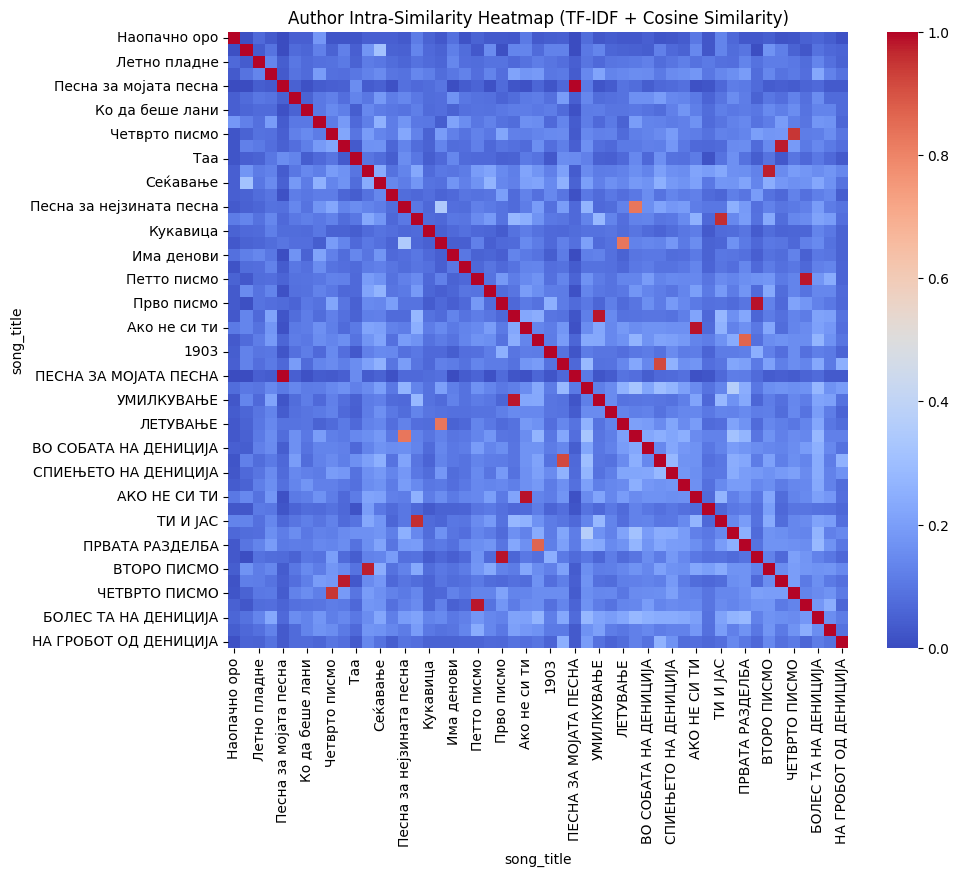

In [8]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(author_selection["song_text"])
similarity_matrix = cosine_similarity(X, X)
similarity_df = pd.DataFrame(
    similarity_matrix,
    index=author_selection["song_title"],
    columns=author_selection["song_title"]
)
plt.figure(figsize=(10, 8))
sns.heatmap(similarity_df, cmap="coolwarm", annot=False)
plt.title("Author Intra-Similarity Heatmap (TF-IDF + Cosine Similarity)")
plt.show()

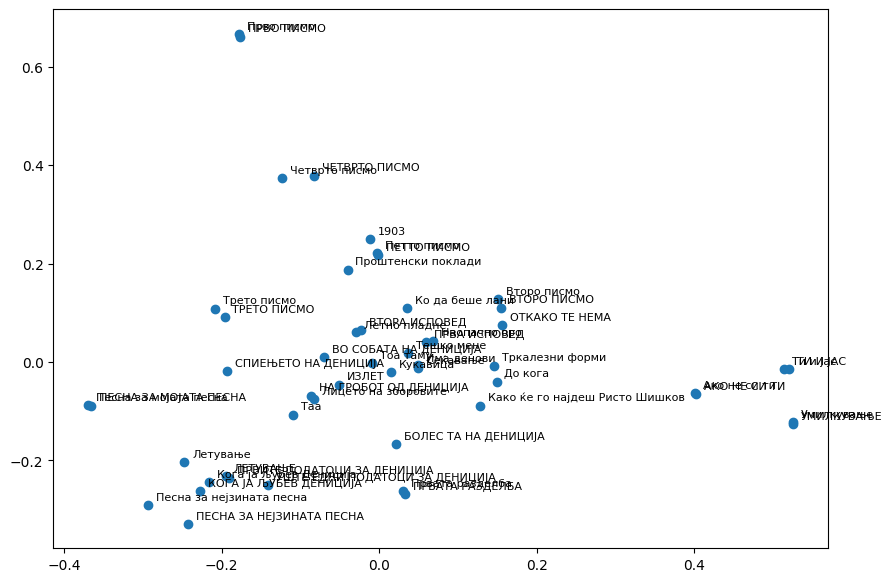

In [9]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(author_selection["song_text"])

data2D = PCA(n_components=2).fit_transform(X.toarray())

plt.figure(figsize=(10, 7))
plt.scatter(data2D[:, 0], data2D[:, 1])

for i, label in enumerate(author_selection["song_title"]):  
    plt.text(data2D[i, 0] + 0.01, data2D[i, 1] + 0.01, label, fontsize=8)

plt.show()


Initial number of rows in df: 1226
Cross-source duplicate pairs: 27

Cross-Source Duplicate Pairs (Second Song's Source Updated, First Song Removed):

Pair 1:
       author         song_title            source                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

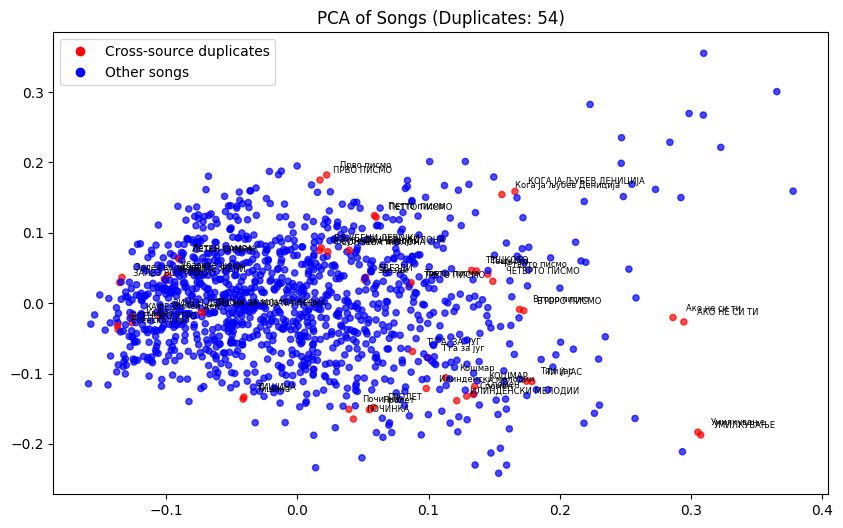

,author,context,additional_context,song_title,song_text,source
0,Петре М. Андреевски,"Петок е прекрасен ден за читање поезија, па за...",NaN,Наопачно оро,Наопачно оро – Петре М. Андреевски\n\nКој игра...,song_kafe_kniga
1,Кочо Рацин,На 13 јуни 1943 година загинал Кочо Рацин. И п...,NaN,Балада за непознатиот,Балада за непознатиот – Кочо Рацин\n\nНатаму –...,song_kafe_kniga
2,Гане Тодоровски,На 22 мај 2010 година починал еден од најголем...,NaN,Молитва,Молитва – Гане Тодоровски\n\n(пред крајот на г...,song_kafe_kniga
3,Владо Урошевиќ,Денес на блогот читаме прекрасни македонски ст...,NaN,Слобода,Слобода – Влада Урошевиќ\n\nПтица со пет крила...,song_kafe_kniga
4,Кочо Рацин,"Денес е 1 Мај, Меѓународен ден на трудот. Во т...",NaN,Копачите,Копачите – Кочо Рацин\n\nСе к’ти ноќта црна!\n...,song_kafe_kniga
...,...,...,...,...,...,...
1194,Ристо Лазаров,NaN,Аргетинци,ЕВИТА,ЕВИТА \n \nветриштата од западните пампаси \...,СРЕДЕ
1195,Ристо Лазаров,NaN,Аргетинци,ГАРДЕЛ,ГАРДЕЛ \n \nа зина уста \nа птици ќе си ги рас...,СРЕДЕ
1196,Ристо Лазаров,NaN,Аргетинци,БОРХЕС,БОРХЕС \n \nза жал светот с# уште е стварен \...,СРЕДЕ
1197,Ристо Лазаров,NaN,Аргетинци,САБАТО,САБАТО \n \nво сантос лагоресу законите на фи...,СРЕДЕ


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA

def find_near_duplicates(df, text_col='song_text', threshold=0.92, n_neighbors=10):
    texts = df[text_col].fillna('').astype(str).tolist()
    if len(texts) < 2:
        return [], None
    tfidf = TfidfVectorizer().fit_transform(texts)
    n_neighbors = min(n_neighbors, len(texts)-1)
    nn = NearestNeighbors(n_neighbors=n_neighbors, metric='cosine').fit(tfidf)
    distances, indices = nn.kneighbors(tfidf)
    cross_source_pairs = []
    for i in range(len(texts)):
        for dist, j in zip(distances[i], indices[i]):
            if i < j and 1 - dist >= threshold:  
                if df.iloc[i]['source'] != df.iloc[j]['source']:  
                    cross_source_pairs.append((i, j))
    return cross_source_pairs, tfidf


print(f"Initial number of rows in df: {len(df)}")
pairs, tfidf = find_near_duplicates(df, 'song_text')
print(f"Cross-source duplicate pairs: {len(pairs)}")

df_unique = df.copy()

removed_indices = set()
print("\nCross-Source Duplicate Pairs (Second Song's Source Updated, First Song Removed):")
for i, (idx1, idx2) in enumerate(pairs[:6], 1):
    print(f"\nPair {i}:")
    pair_data = df.iloc[[idx1, idx2]][['author', 'song_title', 'source', 'song_text']]
    print(pair_data.to_string(index=False))
    df_unique.iloc[idx2, df_unique.columns.get_loc('source')] = df.iloc[idx1]['source']
    removed_indices.add(idx1)

all_removed_indices = set(idx1 for idx1, idx2 in pairs)
print(f"\nTotal indices to be removed: {len(all_removed_indices)}")
print(f"Removed indices: {sorted(all_removed_indices)}")


df_unique = df_unique.drop(index=list(all_removed_indices)).reset_index(drop=True)
print(f"Rows in df_unique: {len(df_unique)}")


df_unique.to_csv('cleaned_songs.csv', index=False)
print("\nDeduplicated dataset with unified sources saved to 'cleaned_songs.csv'")


if tfidf is None or tfidf.shape[0] < 2:
    print("Not enough data for visualization")
else:
    data_2d = PCA(n_components=2, random_state=42).fit_transform(tfidf.toarray())
    duplicate_indices = set(i for pair in pairs for i in pair)
    colors = ['red' if i in duplicate_indices else 'blue' for i in range(len(data_2d))]
    
    plt.figure(figsize=(10, 6))
    plt.scatter(data_2d[:, 0], data_2d[:, 1], c=colors, s=20, alpha=0.7)
    
    for i in duplicate_indices:
        x, y = data_2d[i]
        plt.text(x + 0.01, y + 0.01, df.iloc[i]['song_title'], fontsize=6)
    
    plt.legend(handles=[
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=8),
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=8)],
        labels=['Cross-source duplicates', 'Other songs'])
    
    plt.title(f"PCA of Songs (Duplicates: {len(duplicate_indices)})")
    plt.show()


df_unique

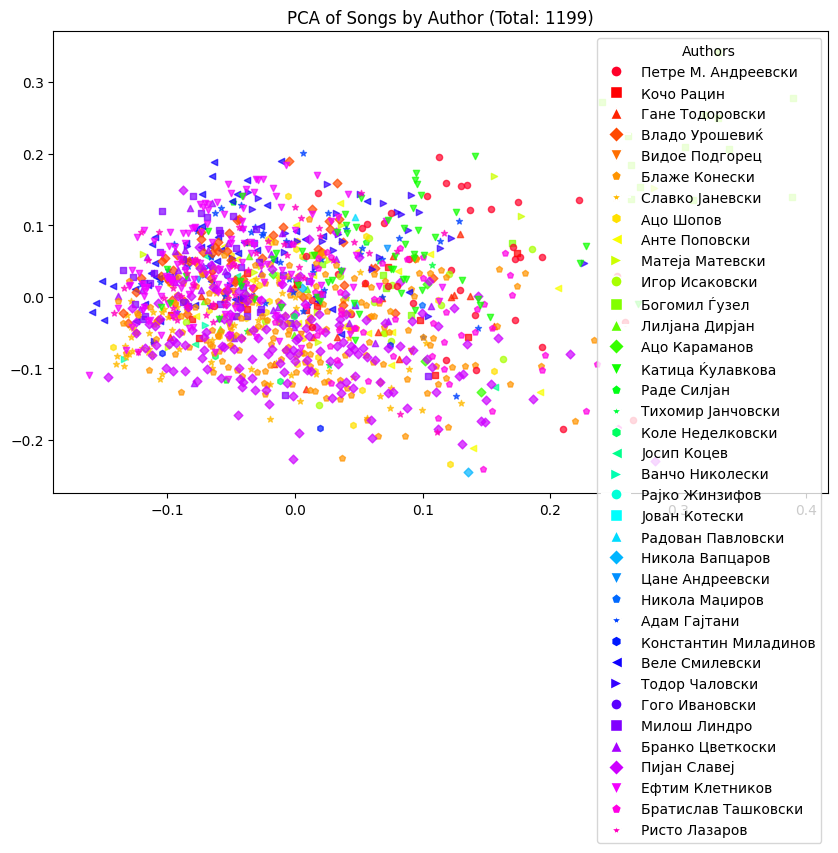

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA


if len(df_unique) < 2 or df_unique['song_text'].isna().all():
    print("Not enough data for visualization")
else:

    texts = df_unique['song_text'].fillna('').astype(str).tolist()
    tfidf = TfidfVectorizer().fit_transform(texts)
    

    data_2d = PCA(n_components=2, random_state=42).fit_transform(tfidf.toarray())
    

    unique_authors = df_unique['author'].unique()
    num_authors = len(unique_authors)

    if num_authors <= 20:
        colors = plt.cm.tab20(np.linspace(0, 1, num_authors))
    else:
        colors = plt.cm.gist_rainbow(np.linspace(0, 1, num_authors))
    

    author_to_color = dict(zip(unique_authors, colors))
    point_colors = [author_to_color[author] for author in df_unique['author']]

    markers = ['o', 's', '^', 'D', 'v', 'p', '*', 'h', '<', '>'] 
    author_to_marker = {author: markers[i % len(markers)] for i, author in enumerate(unique_authors)}
    point_markers = [author_to_marker[author] for author in df_unique['author']]
    
  
    plt.figure(figsize=(10, 6))
    for i in range(len(df_unique)):
        plt.scatter(data_2d[i, 0], data_2d[i, 1], c=[point_colors[i]], s=20, alpha=0.7, marker=point_markers[i])
    

    legend_elements = [plt.Line2D([0], [0], marker=author_to_marker[author], color='w', 
                                  markerfacecolor=author_to_color[author], 
                                  markersize=8, label=author) 
                       for author in unique_authors]
    plt.legend(handles=legend_elements, title='Authors', loc='best')
    
    plt.title(f"PCA of Songs by Author (Total: {len(df_unique)})")
    plt.show()

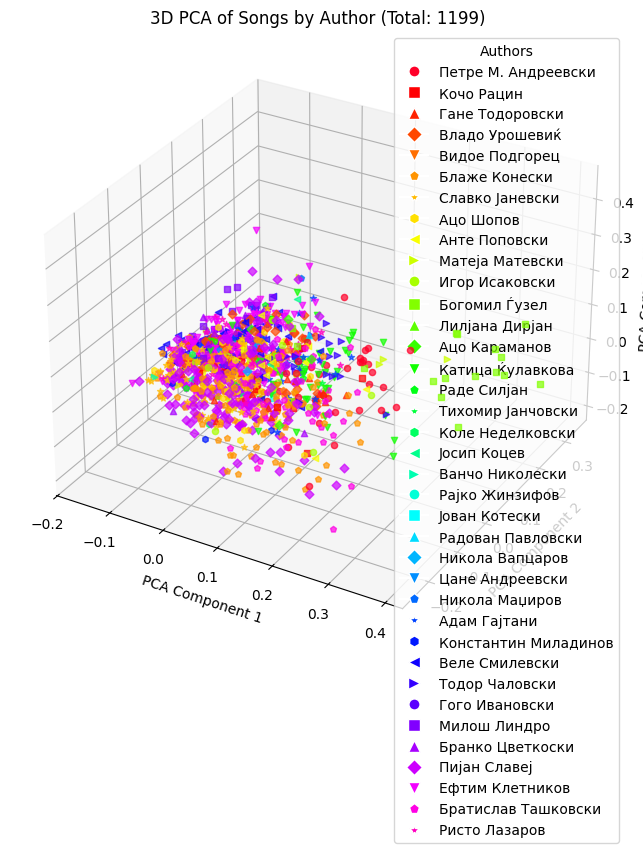

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA


if len(df_unique) < 2 or df_unique['song_text'].isna().all():
    print("Not enough data for visualization")
else:

    texts = df_unique['song_text'].fillna('').astype(str).tolist()
    tfidf = TfidfVectorizer().fit_transform(texts)
    

    data_3d = PCA(n_components=3, random_state=42).fit_transform(tfidf.toarray())
    

    unique_authors = df_unique['author'].unique()
    num_authors = len(unique_authors)

    if num_authors <= 20:
        colors = plt.cm.tab20(np.linspace(0, 1, num_authors))
    else:
        colors = plt.cm.gist_rainbow(np.linspace(0, 1, num_authors))
    

    author_to_color = dict(zip(unique_authors, colors))
    point_colors = [author_to_color[author] for author in df_unique['author']]
    

    markers = ['o', 's', '^', 'D', 'v', 'p', '*', 'h', '<', '>']
    author_to_marker = {author: markers[i % len(markers)] for i, author in enumerate(unique_authors)}
    point_markers = [author_to_marker[author] for author in df_unique['author']]
    

    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    for i in range(len(df_unique)):
        ax.scatter(data_3d[i, 0], data_3d[i, 1], data_3d[i, 2], 
                   c=[point_colors[i]], s=20, alpha=0.7, marker=point_markers[i])
    

    legend_elements = [plt.Line2D([0], [0], marker=author_to_marker[author], color='w', 
                                  markerfacecolor=author_to_color[author], 
                                  markersize=8, label=author) 
                       for author in unique_authors]
    ax.legend(handles=legend_elements, title='Authors', loc='best')
    
    ax.set_title(f"3D PCA of Songs by Author (Total: {len(df_unique)})")
    ax.set_xlabel('PCA Component 1')
    ax.set_ylabel('PCA Component 2')
    ax.set_zlabel('PCA Component 3')
    plt.show()

3D interactive

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA


if len(df_unique) < 2 or df_unique['song_text'].isna().all():
    print("Not enough data for visualization")
else:

    texts = df_unique['song_text'].fillna('').astype(str).tolist()
    tfidf = TfidfVectorizer().fit_transform(texts)
    

    data_3d = PCA(n_components=3, random_state=42).fit_transform(tfidf.toarray())
    

    plot_df = pd.DataFrame({
        'x': data_3d[:, 0],
        'y': data_3d[:, 1],
        'z': data_3d[:, 2],
        'author': df_unique['author'],
        'song_title': df_unique['song_title']
    })
    

    unique_authors = df_unique['author'].unique()
    num_authors = len(unique_authors)
    

    markers = ['circle', 'circle-open', 'square', 'square-open', 'diamond', 'diamond-open', 'cross', 'x']
    marker_map = {author: markers[i % len(markers)] for i, author in enumerate(unique_authors)}
    

    fig = px.scatter_3d(
        plot_df,
        x='x',
        y='y',
        z='z',
        color='author',  
        symbol='author', 
        symbol_map=marker_map,
        hover_data={'song_title': True, 'author': True, 'x': False, 'y': False, 'z': False}, 
        color_continuous_scale=None,  
        color_discrete_sequence=px.colors.qualitative.Plotly if num_authors <= 10 else px.colors.qualitative.D3,
        title=f"3D PCA of Songs by Author (Total: {len(df_unique)})"
    )
    

    fig.update_traces(marker=dict(size=5, opacity=0.7))  
    fig.update_layout(
        scene=dict(
            xaxis_title='PCA Component 1',
            yaxis_title='PCA Component 2',
            zaxis_title='PCA Component 3'
        ),
        legend_title_text='Authors',
        showlegend=True
    )
    
   
    fig.show()

In [16]:
author_counts = df_unique['author'].value_counts()
author_counts.describe()


count     37.000000
mean      32.405405
std       43.864982
min        1.000000
25%        3.000000
50%       15.000000
75%       47.000000
max      182.000000
Name: count, dtype: float64

Smaller author representation (atleast 10 songs from author and showing 10 randomluy picked)

/tmp/ipykernel_106150/840905831.py:13: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



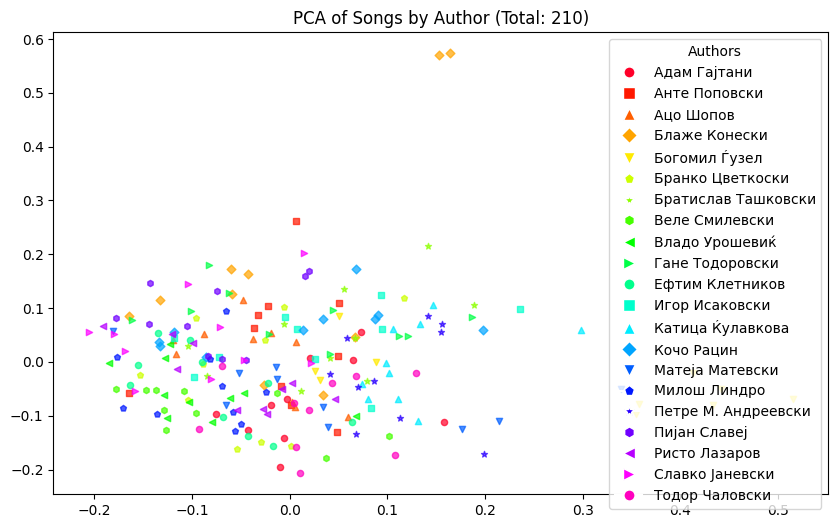

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA


authors_with_min_songs = df_unique['author'].value_counts()
eligible_authors = authors_with_min_songs[authors_with_min_songs >= 10].index
df_filtered = df_unique[df_unique['author'].isin(eligible_authors)]

df_sampled = df_filtered.groupby('author', group_keys=False).apply(lambda x: x.sample(n=min(len(x), 10), random_state=47))

if len(df_sampled) < 2 or df_sampled['song_text'].isna().all():
    print("Not enough data for visualization")
else:
    texts = df_sampled['song_text'].fillna('').astype(str).tolist()
    tfidf = TfidfVectorizer().fit_transform(texts)

    data_2d = PCA(n_components=2, random_state=42).fit_transform(tfidf.toarray())

    unique_authors = df_sampled['author'].unique()
    num_authors = len(unique_authors)

    if num_authors <= 20:
        colors = plt.cm.tab20(np.linspace(0, 1, num_authors))
    else:
        colors = plt.cm.gist_rainbow(np.linspace(0, 1, num_authors))

    author_to_color = dict(zip(unique_authors, colors))
    point_colors = [author_to_color[author] for author in df_sampled['author']]

    markers = ['o', 's', '^', 'D', 'v', 'p', '*', 'h', '<', '>'] 
    author_to_marker = {author: markers[i % len(markers)] for i, author in enumerate(unique_authors)}
    point_markers = [author_to_marker[author] for author in df_sampled['author']]

    plt.figure(figsize=(10, 6))
    for i in range(len(df_sampled)):
        plt.scatter(data_2d[i, 0], data_2d[i, 1], c=[point_colors[i]], s=20, alpha=0.7, marker=point_markers[i])

    legend_elements = [plt.Line2D([0], [0], marker=author_to_marker[author], color='w', 
                                  markerfacecolor=author_to_color[author], 
                                  markersize=8, label=author) 
                       for author in unique_authors]
    plt.legend(handles=legend_elements, title='Authors', loc='best')

    plt.title(f"PCA of Songs by Author (Total: {len(df_sampled)})")
    plt.show()


Centroid for author

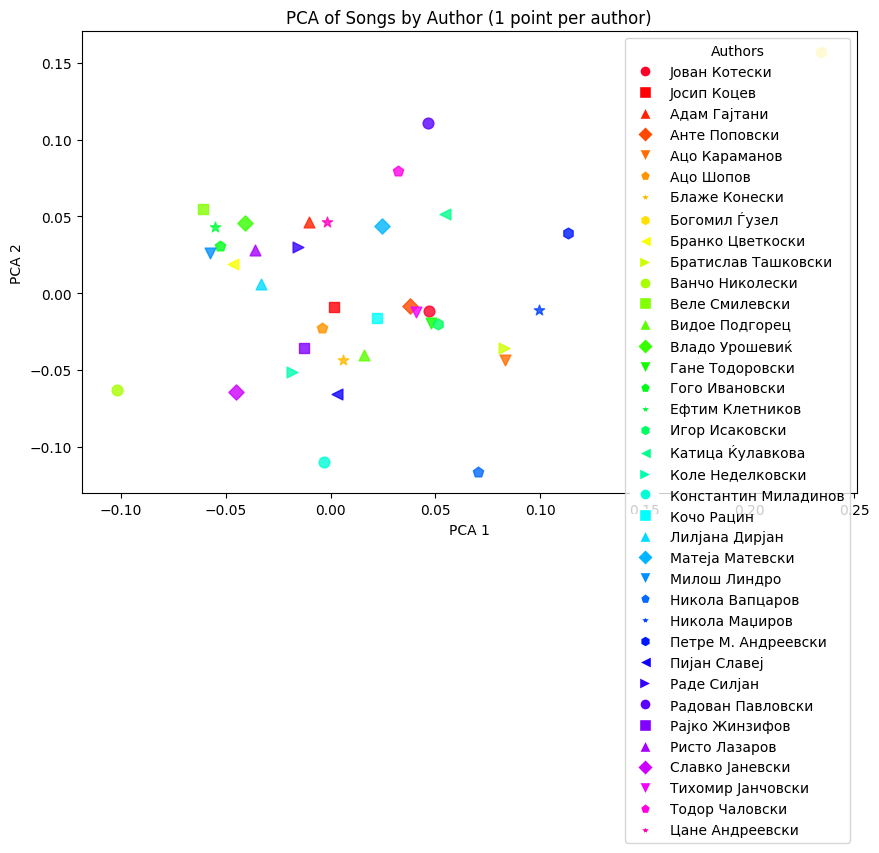

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA


texts = df_unique['song_text'].fillna('').astype(str).tolist()

tfidf = TfidfVectorizer().fit_transform(texts)

data_2d = PCA(n_components=2, random_state=42).fit_transform(tfidf.toarray())

df_unique = df_unique.copy()
df_unique['x'] = data_2d[:, 0]
df_unique['y'] = data_2d[:, 1]

author_centroids = df_unique.groupby('author')[['x', 'y']].mean().reset_index()

unique_authors = author_centroids['author'].values
num_authors = len(unique_authors)

if num_authors <= 20:
    colors = plt.cm.tab20(np.linspace(0, 1, num_authors))
else:
    colors = plt.cm.gist_rainbow(np.linspace(0, 1, num_authors))

author_to_color = dict(zip(unique_authors, colors))

markers = ['o', 's', '^', 'D', 'v', 'p', '*', 'h', '<', '>'] 
author_to_marker = {author: markers[i % len(markers)] for i, author in enumerate(unique_authors)}

plt.figure(figsize=(10, 6))
for _, row in author_centroids.iterrows():
    plt.scatter(row['x'], row['y'], 
                c=[author_to_color[row['author']]], 
                s=60, alpha=0.8, 
                marker=author_to_marker[row['author']], 
                label=row['author'])

# Legend
legend_elements = [plt.Line2D([0], [0], marker=author_to_marker[author], color='w',
                              markerfacecolor=author_to_color[author],
                              markersize=8, label=author)
                   for author in unique_authors]
plt.legend(handles=legend_elements, title='Authors', loc='best')

plt.title(f"PCA of Songs by Author (1 point per author)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()


Medoid

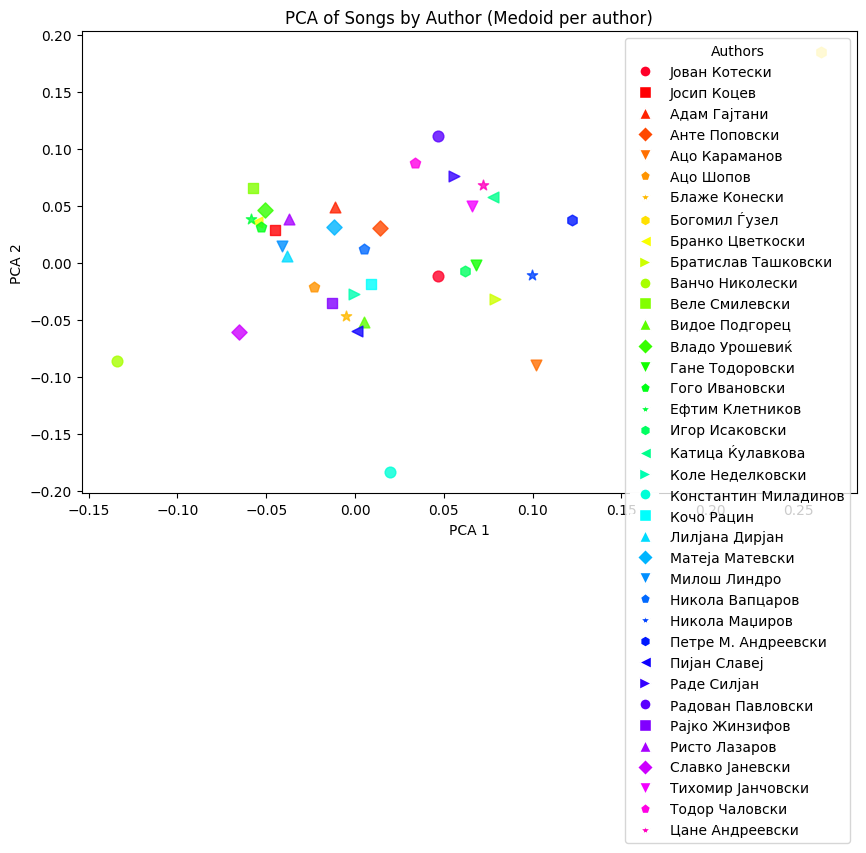

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from scipy.spatial.distance import cdist


texts = df_unique['song_text'].fillna('').astype(str).tolist()

tfidf = TfidfVectorizer().fit_transform(texts)

data_2d = PCA(n_components=2, random_state=42).fit_transform(tfidf.toarray())

df_unique = df_unique.copy()
df_unique['x'] = data_2d[:, 0]
df_unique['y'] = data_2d[:, 1]


medoid_points = []
for author, group in df_unique.groupby('author'):
    coords = group[['x', 'y']].values
    distances = cdist(coords, coords, metric='euclidean')
    total_distances = distances.sum(axis=1)
    medoid_idx = total_distances.argmin()
    medoid_points.append({'author': author,
                          'x': coords[medoid_idx, 0],
                          'y': coords[medoid_idx, 1]})

medoid_df = pd.DataFrame(medoid_points)

unique_authors = medoid_df['author'].values
num_authors = len(unique_authors)


if num_authors <= 20:
    colors = plt.cm.tab20(np.linspace(0, 1, num_authors))
else:
    colors = plt.cm.gist_rainbow(np.linspace(0, 1, num_authors))

author_to_color = dict(zip(unique_authors, colors))

markers = ['o', 's', '^', 'D', 'v', 'p', '*', 'h', '<', '>'] 
author_to_marker = {author: markers[i % len(markers)] for i, author in enumerate(unique_authors)}

plt.figure(figsize=(10, 6))
for _, row in medoid_df.iterrows():
    plt.scatter(row['x'], row['y'], 
                c=[author_to_color[row['author']]], 
                s=60, alpha=0.8, 
                marker=author_to_marker[row['author']], 
                label=row['author'])

legend_elements = [plt.Line2D([0], [0], marker=author_to_marker[author], color='w',
                              markerfacecolor=author_to_color[author],
                              markersize=8, label=author)
                   for author in unique_authors]
plt.legend(handles=legend_elements, title='Authors', loc='best')

plt.title(f"PCA of Songs by Author (Medoid per author)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()


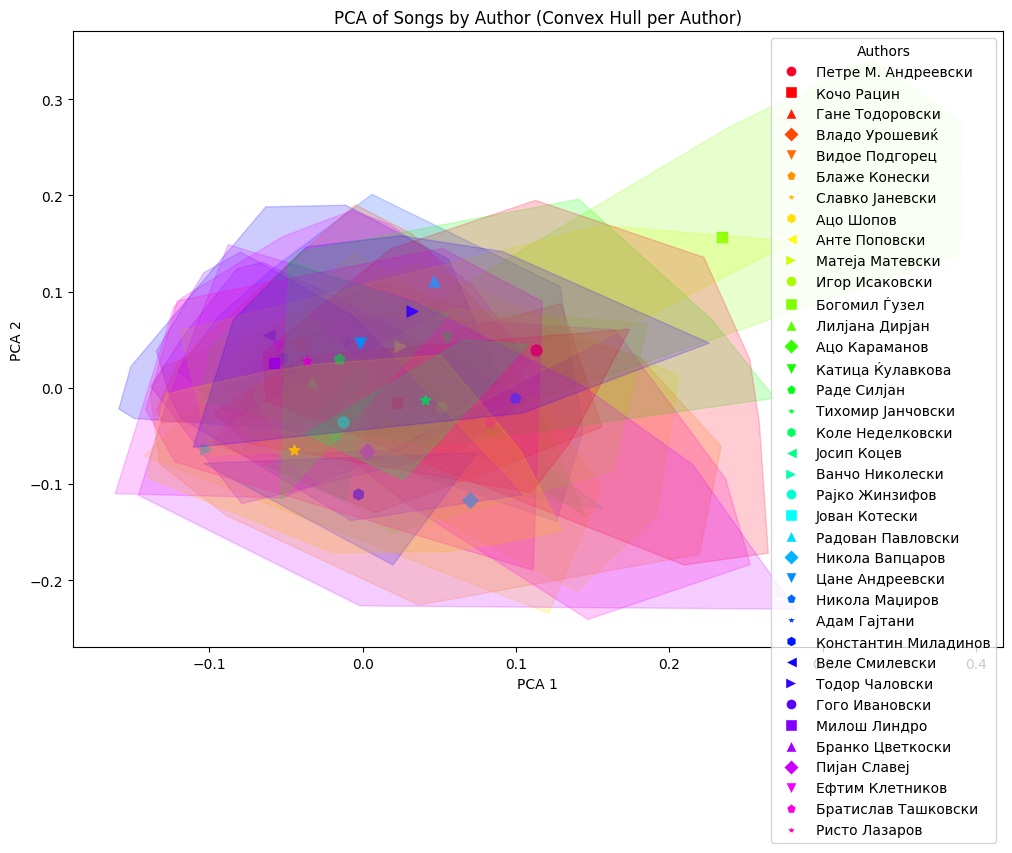

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from scipy.spatial import ConvexHull


texts = df_unique['song_text'].fillna('').astype(str).tolist()
tfidf = TfidfVectorizer().fit_transform(texts)


data_2d = PCA(n_components=2, random_state=42).fit_transform(tfidf.toarray())


df_unique = df_unique.copy()
df_unique['x'] = data_2d[:, 0]
df_unique['y'] = data_2d[:, 1]

unique_authors = df_unique['author'].unique()
num_authors = len(unique_authors)


if num_authors <= 20:
    colors = plt.cm.tab20(np.linspace(0, 1, num_authors))
else:
    colors = plt.cm.gist_rainbow(np.linspace(0, 1, num_authors))

author_to_color = dict(zip(unique_authors, colors))


markers = ['o', 's', '^', 'D', 'v', 'p', '*', 'h', '<', '>'] 
author_to_marker = {author: markers[i % len(markers)] for i, author in enumerate(unique_authors)}

plt.figure(figsize=(12, 8))

for author, group in df_unique.groupby('author'):
    coords = group[['x', 'y']].values


    if len(coords) >= 3:
        hull = ConvexHull(coords)
        hull_points = coords[hull.vertices]
        plt.fill(hull_points[:,0], hull_points[:,1], color=author_to_color[author], alpha=0.2)

    #
    centroid = coords.mean(axis=0)
    plt.scatter(centroid[0], centroid[1], 
                c=[author_to_color[author]], 
                s=60, alpha=0.9, 
                marker=author_to_marker[author], 
                label=author)


legend_elements = [plt.Line2D([0], [0], marker=author_to_marker[author], color='w',
                              markerfacecolor=author_to_color[author],
                              markersize=8, label=author)
                   for author in unique_authors]
plt.legend(handles=legend_elements, title='Authors', loc='best')

plt.title("PCA of Songs by Author (Convex Hull per Author)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()


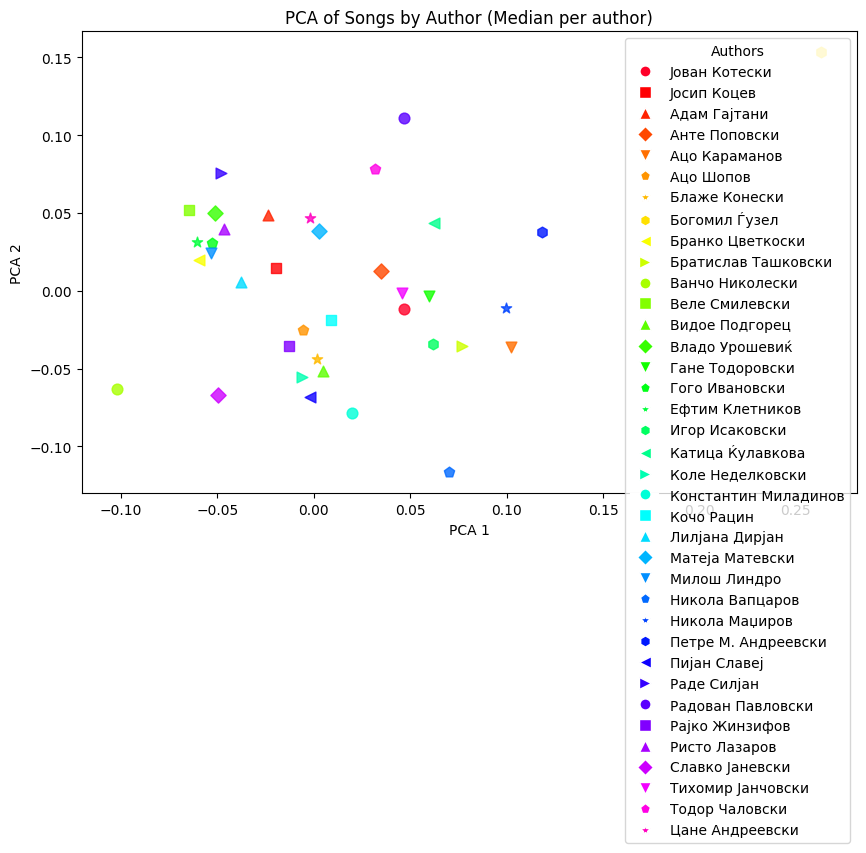

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

texts = df_unique['song_text'].fillna('').astype(str).tolist()

tfidf = TfidfVectorizer().fit_transform(texts)

data_2d = PCA(n_components=2, random_state=42).fit_transform(tfidf.toarray())

df_unique = df_unique.copy()
df_unique['x'] = data_2d[:, 0]
df_unique['y'] = data_2d[:, 1]

median_points = df_unique.groupby('author')[['x', 'y']].median().reset_index()

unique_authors = median_points['author'].values
num_authors = len(unique_authors)

if num_authors <= 20:
    colors = plt.cm.tab20(np.linspace(0, 1, num_authors))
else:
    colors = plt.cm.gist_rainbow(np.linspace(0, 1, num_authors))

author_to_color = dict(zip(unique_authors, colors))

markers = ['o', 's', '^', 'D', 'v', 'p', '*', 'h', '<', '>'] 
author_to_marker = {author: markers[i % len(markers)] for i, author in enumerate(unique_authors)}

plt.figure(figsize=(10, 6))
for _, row in median_points.iterrows():
    plt.scatter(row['x'], row['y'], 
                c=[author_to_color[row['author']]], 
                s=60, alpha=0.8, 
                marker=author_to_marker[row['author']], 
                label=row['author'])


legend_elements = [plt.Line2D([0], [0], marker=author_to_marker[author], color='w',
                              markerfacecolor=author_to_color[author],
                              markersize=8, label=author)
                   for author in unique_authors]
plt.legend(handles=legend_elements, title='Authors', loc='best')

plt.title("PCA of Songs by Author (Median per author)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()
